# OneWay ANOVA 

Install the car package using this command:    
`conda install -c r r-car `

In [1]:
library(ggplot2)
library(car)

Loading required package: carData


In [2]:
options(repr.plot.width = 6, repr.plot.height = 4)

### Load and read dataset from given URL

https://www.kaggle.com/gauravgulati9c/zomato-eda-indian-restaurants-updated/data

In [3]:
zomato <- read.csv('datasets/zomato.csv')

In [4]:
colnames(zomato)

[1] "Restaurant.ID"        "Restaurant.Name"      "Country.Code"        
 [4] "City"                 "Address"              "Locality"            
 [7] "Locality.Verbose"     "Longitude"            "Latitude"            
[10] "Cuisines"             "Average.Cost.for.two" "Currency"            
[13] "Has.Table.booking"    "Has.Online.delivery"  "Is.delivering.now"   
[16] "Switch.to.order.menu" "Price.range"          "Aggregate.rating"    
[19] "Rating.color"         "Rating.text"          "Votes"

In [5]:
zomato <- zomato[, c('Price.range' , 'Aggregate.rating', 'Votes')]

In [6]:
head(zomato)

Price.range,Aggregate.rating,Votes
3,4.8,314
3,4.5,591
4,4.4,270
4,4.9,365
4,4.8,229
3,4.4,336


In [7]:
colSums(is.na(zomato))

Price.range Aggregate.rating            Votes 
               0                0                0

In [8]:
dim(zomato)

[1] 9551    3

In [10]:
zomato <- zomato[sample(nrow(zomato), 4000),]

dim(zomato)

[1] 4000    3

In [11]:
str(zomato)

'data.frame':	4000 obs. of  3 variables:
 $ Price.range     : int  1 2 1 2 2 1 2 1 2 1 ...
 $ Aggregate.rating: num  3.6 0 3.8 2.8 2.9 2.8 4.1 2.9 2.7 2.6 ...
 $ Votes           : int  20 0 201 19 7 63 199 7 52 138 ...


In [12]:
table(zomato$Price.range)


   1    2    3    4 
1850 1297  591  262 

### Barplot

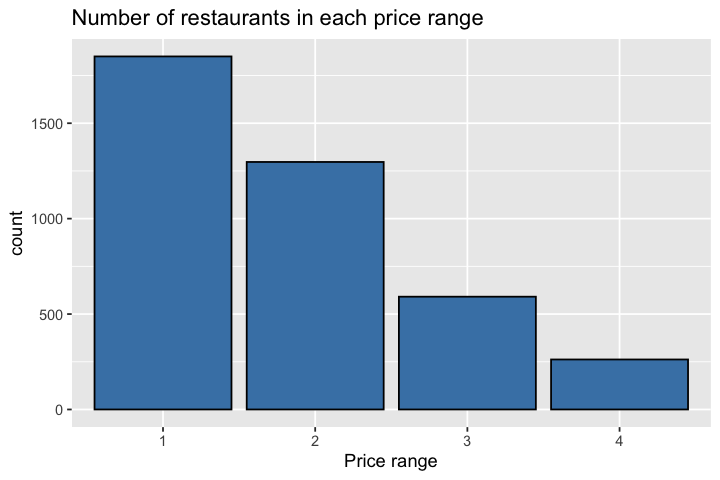

In [13]:
ggplot(data = zomato, 
       aes(factor(x = Price.range))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Number of restaurants in each price range')+
       xlab('Price range') +
       ylab('count')

In [14]:
summary(zomato$Aggregate.rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.600   3.200   2.684   3.700   4.900 

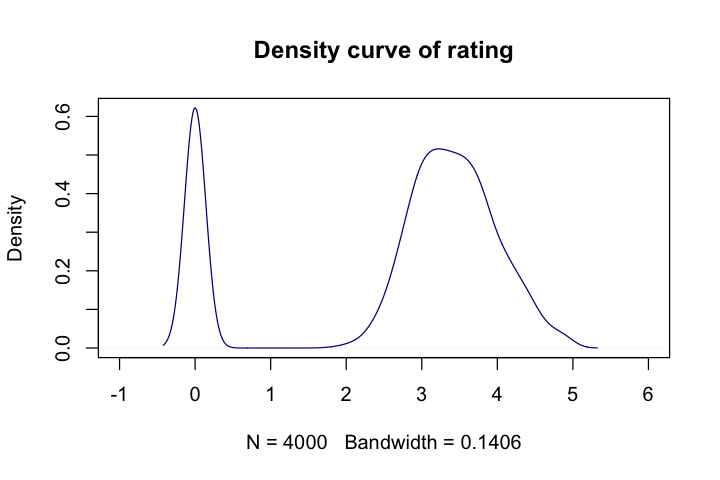

In [15]:
plot(density(zomato$Aggregate.rating), col = 'darkblue', 
     main = 'Density curve of rating', xlim=c(-1, 6))

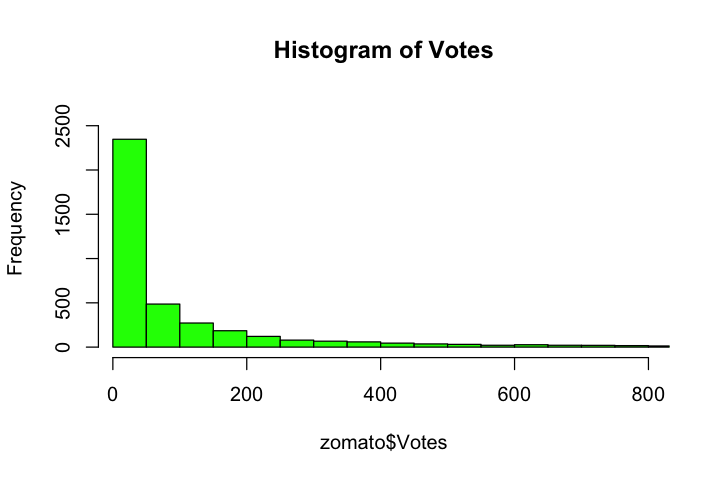

In [16]:
hist(zomato$Votes, breaks=100, col="green", 
     main = 'Histogram of Votes',
     xlim=c(10, 800), ylim=c(-10, 2700))

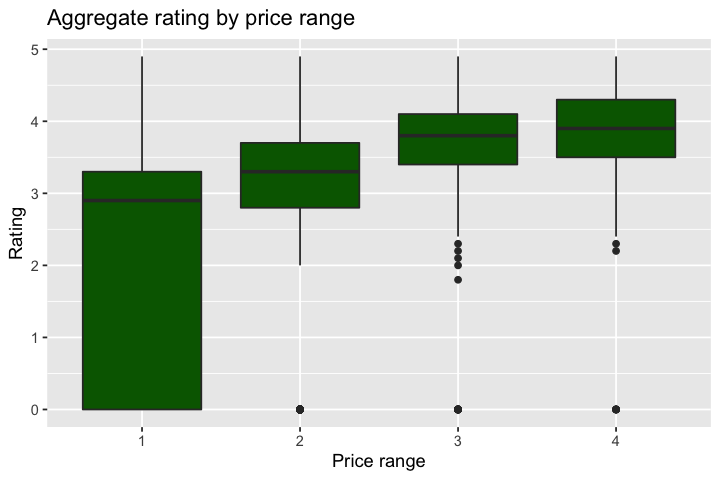

In [17]:
qplot(factor(x = Price.range), y = Aggregate.rating,
      geom = 'boxplot',
      main = 'Aggregate rating by price range',  
      data = zomato,
      xlab = 'Price range',
      ylab = 'Rating',
      fill = I('darkgreen')
)

### ANOVA test hypotheses:-
* __Null hypothesis(H0):- The means of the diferent groups are the same.__
* __alternate hypothesis(H1):- At least one sample mean is not equal to others.__

http://www.sthda.com/english/wiki/one-way-anova-test-in-r#how-one-way-anova-test-works

### Calculate Oneway ANOVA test

__Note:-__ ANOVA test with assumption of equal variances

In [18]:
anova_test <- aov(zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)

summary(anova_test)

                             Df Sum Sq Mean Sq F value Pr(>F)    
factor(zomato$Price.range)    3   1704   568.0   308.6 <2e-16 ***
Residuals                  3996   7356     1.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Summary of ANOVA test

__In the above result you can see that `p-value = 2e-16` is less then significance level `0.05` that mean atleast mean of one group is not equal to other__

__Note:-__
* __How can you detect which two group's mean are not equal?__
for this answer you can take help of __Tukey Honest Significant Differences or TukeyHD() function in R__ and will be able to find which two group are not equal. which is explain below.

In [19]:
names(anova_test)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

### Find values with ANOVA test

In [20]:
anova_test$coefficients

(Intercept) factor(zomato$Price.range)2 
                  2.0459459                   0.8825814 
factor(zomato$Price.range)3 factor(zomato$Price.range)4 
                  1.6063383                   1.7418403

In [21]:
anova_test$xlevels

$`factor(zomato$Price.range)`
[1] "1" "2" "3" "4"

In [22]:
anova_test$call

aov(formula = zomato$Aggregate.rating ~ factor(zomato$Price.range), 
    data = zomato)

### Tukey multiple pairwise-comparisons
http://www.sthda.com/english/wiki/one-way-anova-test-in-r#how-one-way-anova-test-works

In [23]:
TukeyHSD(anova_test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)

$`factor(zomato$Price.range)`
         diff        lwr       upr     p adj
2-1 0.8825814  0.7562944 1.0088684 0.0000000
3-1 1.6063383  1.4415713 1.7711054 0.0000000
4-1 1.7418403  1.5116556 1.9720251 0.0000000
3-2 0.7237569  0.5506942 0.8968196 0.0000000
4-2 0.8592589  0.6230651 1.0954527 0.0000000
4-3 0.1355020 -0.1233170 0.3943210 0.5338573


### LeveneTest and Shapiro-Wilk 

http://www.sthda.com/english/wiki/one-way-anova-test-in-r#how-one-way-anova-test-works

### Check the normality assumption

Normality plot of residuals. In the plot below, the quantiles of the residuals are plotted against the quantiles of the normal distribution. A 45-degree reference line is also plotted.

The normal probability plot of residuals is used to check the assumption that the residuals are normally distributed. It should approximately follow a straight line.

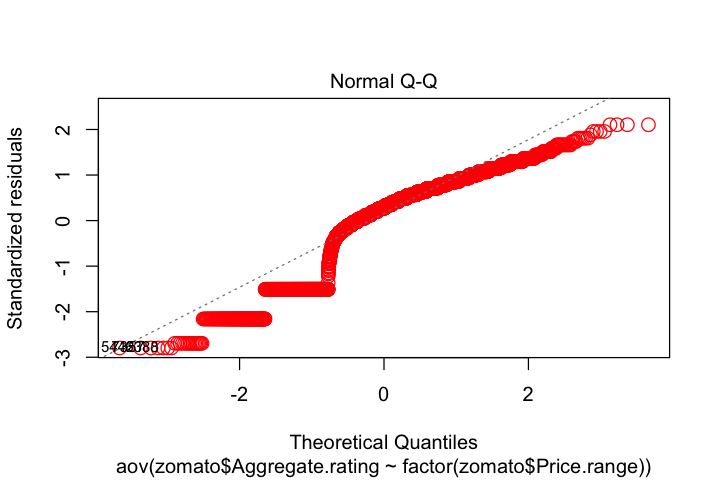

In [24]:
plot(anova_test, 2, col = "red", cex = 1.5)

### Shapiro-Wilk test

In [25]:
aov_residuals <- residuals(object = anova_test)

shapiro.test(x = aov_residuals )


	Shapiro-Wilk normality test

data:  aov_residuals
W = 0.89239, p-value < 2.2e-16


In [26]:
levene_test <- leveneTest(zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)
levene_test

,Df,F value,Pr(>F)
group,3,130.5937,1.051125e-80
,3996,NA,NA


# ANOVA test with no assumption of equal variances

http://www.sthda.com/english/wiki/one-way-anova-test-in-r#relaxing-the-homogeneity-of-variance-assumption

__Note:- If your assumsion that the above data are not normaly distributed then you can use `Welch one-way test` (By using function oneway.test) `Pairwise.t.test`.__

### Welch one-way test
* ANOVA test with no assumption of equal variances


http://www.sthda.com/english/wiki/one-way-anova-test-in-r#how-one-way-anova-test-works

In [27]:
oneway.test(zomato$Aggregate.rating ~ factor(zomato$Price.range), data = zomato)


	One-way analysis of means (not assuming equal variances)

data:  zomato$Aggregate.rating and factor(zomato$Price.range)
F = 418.75, num df = 3.0, denom df = 1149.4, p-value < 2.2e-16


### Pairwise.t.test
http://www.sthda.com/english/wiki/one-way-anova-test-in-r#relaxing-the-homogeneity-of-variance-assumption

* ANOVA test with no assumption of equal variances

In [28]:
pairwise.t.test(zomato$Aggregate.rating, zomato$Price.range,
                p.adjust.method = "BH", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  zomato$Aggregate.rating and zomato$Price.range 

  1      2      3    
2 <2e-16 -      -    
3 <2e-16 <2e-16 -    
4 <2e-16 <2e-16 0.029

P value adjustment method: BH 

### Kruskal-Wallis one-way analysis of variance

Does not assume normal distribution of residuals but makes the assumptions of an identically shaped and scaled distribution for all groups. Tests to see whether group medians are equal.

https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

In [33]:
kruskal.test(zomato$Votes, zomato$Price.range, data = zomato)


	Kruskal-Wallis rank sum test

data:  zomato$Votes and zomato$Price.range
Kruskal-Wallis chi-squared = 1191, df = 3, p-value < 2.2e-16
